In [2]:
# Importing Libraries
import ast
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleaning 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
# New df_DA filttered for Data Analyst Data

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

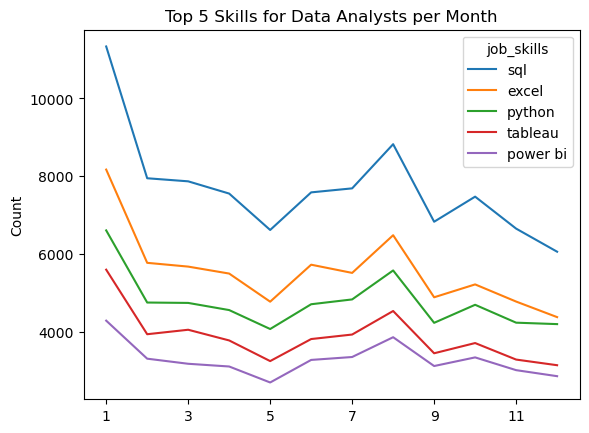

In [5]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
# Create a new column for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explotde the job_skills column and pivot
df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table( index='job_posted_month_no', columns= 'job_skills', aggfunc= 'size', fill_value= 0)

# Sort the Skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

# Get the top 5 skills
df_DA_pivot.iloc[:, :5]
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

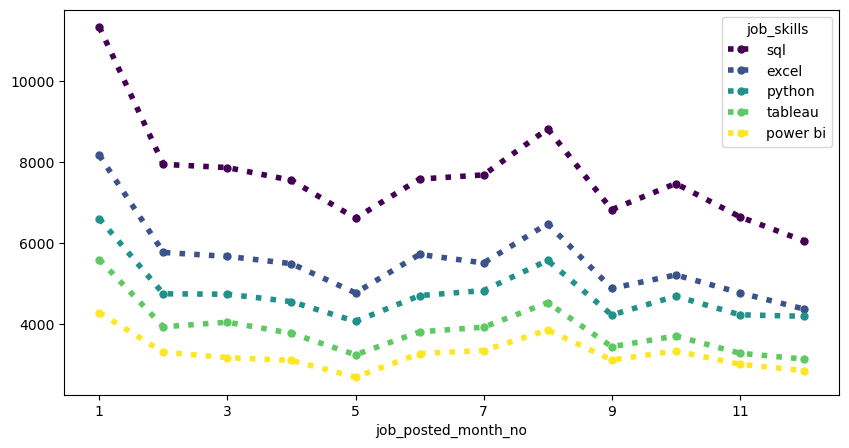

In [13]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':', # options: '-' ,  '--' ,  '-.'  , ':'
    colormap= 'viridis', # options: 'virdis', 'plasma', 'inferno', 'magma', 'cividis'
    markersize= 5,
    marker='o',
    figsize=(10, 5)
 )

plt.show()

In [19]:
# Ecplode the 'job_skills' into individual rows
df_exploded = df_DA.explode('job_skills')

# Calculate the average salary and count of job postings per skill
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count =('job_skills', 'count')   
)

# Limit to the top skills
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

skill_stats

,median_salary,skill_count
job_skills,,
sql,92500.000000,92428
excel,84479.000000,66860
python,98500.000000,57190
tableau,95000.000000,46455
power bi,90000.000000,39380
r,92527.500000,29996
sas,90000.000000,27998
powerpoint,85000.000000,13822
word,80000.000000,13562


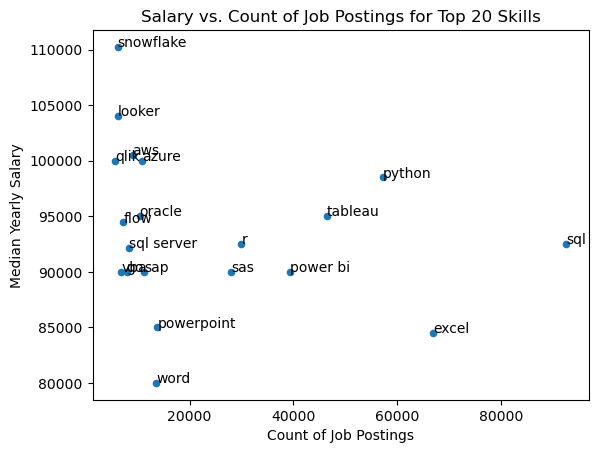

In [20]:
#plotting
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

# How to add text to the plot
for i, text in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], text)


# Formatting the Plot 
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout
plt.show()


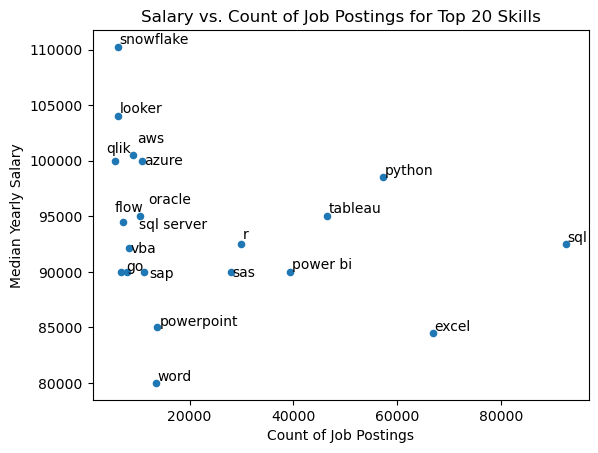

In [ ]:
# Using the adjustText Library to adjust the text 
from adjustText import adjust_text

#plotting
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

# words --> variabl --> stores all text labels
#.append() --> method --> add one item to the list
# plt.text() --> function --> Create a text label on the plot
# adjust_text --> function --> Move labels to avoid overlaps

# How to add text to the plot
words=[] # A variable that we made it's a list that will store all the label objects
for i, text in enumerate(skill_stats.index):
    # .append it's list method in python it adds a new item to the end of the list 
    # means here we're adding whatever is returned by plt.etext(....) into the texts list
    # So, texts is the variable list we made & append is a method from the adjustText library
    words.append(
        # plt.text --> is a function from Matplotlib that creats a text label on a plot 
        plt.text(
            skill_stats['skill_count'].iloc[i],
            skill_stats['median_salary'].iloc[i],
            text
        )
    )

# You create a list called texts to hold text labels.
# Each time you call plt.text(...), you add that label to the list using .append().
# After the loop, you pass that list into adjust_text() to automatically rearrange the labels.
adjust_text(words)

# Formatting the Plot 
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout
plt.show()


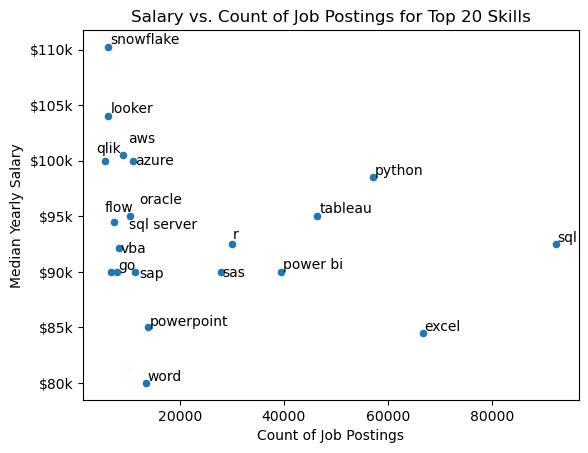

In [ ]:
# here we're not modifying the figure itself but we're going to be modifying the axis
# So, we need to access the axis object form plt. form the matplotlib library

from adjustText import adjust_text

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

words=[]
for i, text in enumerate(skill_stats.index):
    words.append(
        plt.text(
            skill_stats['skill_count'].iloc[i],
            skill_stats['median_salary'].iloc[i],
            text
        )
    )

adjust_text(words)

# Customizing the y axis better format for the values to be with $ sign and with just first three digits of the thousands and then specifying the thousand by a k value 
# It gives you access to the chart's axes
# using matplotlib library
# ax.yaxis --> (means that we're workeing on the y axis) & set_major_formatter --> Change how the main tick labels (numbers) on hte y axis are display
#give matlplotlib a small function to decide how to show eahc number on the text
# Notice: here the parameters in lambda is usually y or x axis and pos
ax = plt.gca()

ax.yaxis.set_major_formatter(plt.FuncFormatter (lambda y, pos: f'${int(y/1000)}k'))  



plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout
plt.show()
